In [1]:
import numpy as np


class TrafficEnvironment:
    def __init__(self):
        self.state = np.random.randint(0, 10, size=4)  # [North, South, East, West]
        self.current_light = 0  # 0: Green for NS, 1: Green for EW

    def step(self, action):
        if action == 1:
            self.current_light = 1 - self.current_light  # Switch traffic lights

        if self.current_light == 0:  # NS Green, EW Red
            passed = min(self.state[0], np.random.randint(1, 5)) + min(self.state[1], np.random.randint(1, 5))
            self.state[0] = max(0, self.state[0] - passed)
            self.state[1] = max(0, self.state[1] - passed)
        else:  # EW Green, NS Red
            passed = min(self.state[2], np.random.randint(1, 5)) + min(self.state[3], np.random.randint(1, 5))
            self.state[2] = max(0, self.state[2] - passed)
            self.state[3] = max(0, self.state[3] - passed)

        new_cars = np.random.randint(0, 3, size=4)
        self.state += new_cars
        reward = passed

        return self.state,reward

    def reset(self):
        self.state = np.random.randint(0, 10, size=4)
        self.current_light = 0
        return self.state


# Test the environment
env = TrafficEnvironment()
state = env.reset()

print("🚦 Initial Traffic Light Simulation 🚦")
print("State Format: [Cars North, Cars South, Cars East, Cars West]")
print("Actions: 0 = Keep Current Light, 1 = Switch Light")
print(f"Initial state: {state} (NS Green, EW Red)")

for i in range(10):
    action = np.random.choice([0, 1])
    next_state, reward = env.step(action)

    light_status = "NS Green, EW Red" if env.current_light == 0 else "EW Green, NS Red"
    print(f"Step {i + 1}:")
    print(f"  ➡ Action Taken: {action} ({'Switch' if action == 1 else 'Keep'})")
    print(f"  🚥 Light Status: {light_status}")
    print(f"  🏎 Cars State: {next_state}")
    print(f"  🎯 Reward (Cars Passed): {reward}")
    print("-" * 40)

🚦 Initial Traffic Light Simulation 🚦
State Format: [Cars North, Cars South, Cars East, Cars West]
Actions: 0 = Keep Current Light, 1 = Switch Light
Initial state: [3 5 8 0] (NS Green, EW Red)
Step 1:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [0 2 9 1]
  🎯 Reward (Cars Passed): 5
----------------------------------------
Step 2:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [2 4 7 2]
  🎯 Reward (Cars Passed): 3
----------------------------------------
Step 3:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [4 6 5 1]
  🎯 Reward (Cars Passed): 4
----------------------------------------
Step 4:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [4 7 4 0]
  🎯 Reward (Cars Passed): 2
----------------------------------------
Step 5:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [5 9 2 2]
  🎯 Reward (Cars Passed): 4
----------------------

# Exercice 2

In [ ]:
import random
num_states = env.observation_space.n   # Nombre total d'états
num_actions = env.action_space.n       # Nombre d'actions (4 : gauche, droite, haut, bas)
q_table = np.zeros((num_states, num_actions))

In [ ]:
import random
num_states = env.observation_space.n   # Nombre total d'états
num_actions = env.action_space.n       # Nombre d'actions (4 : gauche, droite, haut, bas)
q_table = np.zeros((num_states, num_actions))

alpha = 0.1      # Taux d'apprentissage
gamma = 0.99     # Facteur de discount
epsilon = 1.0    # Exploration initiale
epsilon_min = 0.01 
epsilon_decay = 0.009  # Décroissance progressive d'epsilon
num_episodes = 10000  # Nombre d'épisodes d'entraînement

def train_q_learning(env, episodes=num_episodes, alpha=alpha, gamma=gamma, epsilon=epsilon, decay=epsilon_decay):
    for episode in range(episodes):
        state, _ = env.reset()
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Exploration (choisir une action aléatoire)
            else:
                action = np.argmax(q_table[state, :])  # Exploitation (prendre la meilleure action connue)

            
            next_state, reward, done, truncated, _ = env.step(action)

            
            q_table[state, action] = q_table[state, action] + alpha * (
                reward + gamma * np.max(q_table[next_state, :]) - q_table[state, action]
            )

            state = next_state  # Mise à jour de l'état

        if epsilon > epsilon_min:
            epsilon *= decay

        if episode % 100 == 0:
            print(f"Épisode {episode}/{episodes} terminé - epsilon : {epsilon:.4f}")


train_q_learning(env)


print("\n Q-Table après entraînement :")
print(q_table)

env.close()


# Exercice 3

In [ ]:
num_states = env.observation_space.n   # Nombre total d'états
num_actions = env.action_space.n      # Nombre d'actions (4 : gauche, droite, haut, bas)
q_table_sarsa = np.zeros((num_states, num_actions))


alpha = 0.1      # Taux d'apprentissage
gamma = 0.99     # Facteur de discount
epsilon = 1.0    # Exploration initiale
epsilon_decay = 0.995  # Décroissance progressive d'epsilon
num_episodes = 1000  # Nombre d'épisodes d'entraînement


def train_sarsa(env, episodes=num_episodes, alpha=alpha, gamma=gamma, epsilon=epsilon, decay=epsilon_decay):
    for episode in range(episodes):
        state, _ = env.reset()
        done = False

     
        action = (
            env.action_space.sample()
            if random.uniform(0, 1) < epsilon
            else np.argmax(q_table_sarsa[state, :])
        )

        while not done:
           
            next_state, reward, done, truncated, _ = env.step(action)

            
            next_action = (
                env.action_space.sample()
                if random.uniform(0, 1) < epsilon
                else np.argmax(q_table_sarsa[next_state, :])
            )

           
            q_table_sarsa[state, action] += alpha * (
                reward + gamma * q_table_sarsa[next_state, next_action] - q_table_sarsa[state, action]
            )

            state, action = next_state, next_action  # Mise à jour de l'état et de l'action

        if epsilon > epsilon_min:
            epsilon *= decay
        
        if episode % 100 == 0:
            print(f"Épisode {episode}/{episodes} terminé - epsilon : {epsilon:.4f}")


train_sarsa(env)

print("\n Q-Table après entraînement (SARSA) :")
print(q_table_sarsa)

env.close()


# Exercice 4

In [10]:
q_table

array([[0.02603231, 0.02430217, 0.02521567, 0.02374254],
       [0.01331211, 0.01927077, 0.01822484, 0.02313956],
       [0.02290763, 0.02096668, 0.02640993, 0.01363221],
       [0.0102243 , 0.00796829, 0.00483643, 0.0099052 ],
       [0.02719589, 0.01764258, 0.01320524, 0.01811329],
       [0.        , 0.        , 0.        , 0.        ],
       [0.03397968, 0.01211226, 0.05364257, 0.00438493],
       [0.        , 0.        , 0.        , 0.        ],
       [0.01621477, 0.03593972, 0.03072847, 0.02865523],
       [0.04565713, 0.04660038, 0.07347867, 0.03823656],
       [0.06310232, 0.12890554, 0.13154782, 0.00915928],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.03645225, 0.0271233 , 0.08014925, 0.10350028],
       [0.10460941, 0.39745803, 0.33577815, 0.1031421 ],
       [0.        , 0.        , 0.        , 0.        ]])

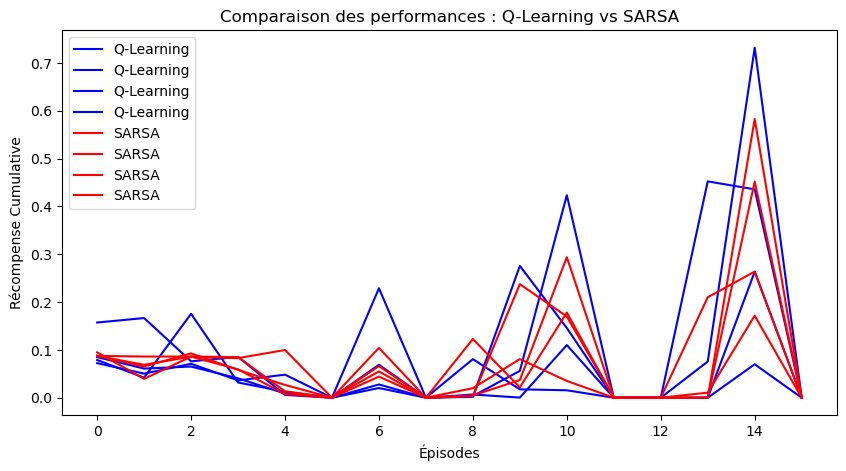

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(q_table, label="Q-Learning", color='blue')
plt.plot(q_table_sarsa, label="SARSA", color='red')
plt.xlabel("Épisodes")
plt.ylabel("Récompense Cumulative")
plt.legend()
plt.title("Comparaison des performances : Q-Learning vs SARSA")
plt.show()